<a href="https://colab.research.google.com/github/nikitha-moorthi/Comparison-of-ML-Classification-Algorithms/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/phase2/tot_dataset/tot_dataset

test  train


In [ ]:
#Class to load the dataset images from drive
import os
import cv2
import numpy as np


class SimpleDatasetLoader:
    # Method: Constructor
    def __init__(self, preprocessors=None):
        """
        :param preprocessors: List of image preprocessors
        """
        self.preprocessors = preprocessors

        if self.preprocessors is None:
            self.preprocessors = []

    # Method: Used to load a list of images for pre-processing
    def load(self, image_paths, verbose=-1):
        """
        :param image_paths: List of image paths
        :param verbose: Parameter for printing information to console
        :return: Tuple of data and labels
        """
        data, labels = [], []

        for i, image_path in enumerate(image_paths):
            image = cv2.imread(image_path)
            label = image_path.split(os.path.sep)[-2]

            if self.preprocessors is not None:
                for p in self.preprocessors:
                    image = p.preprocess(image)

            data.append(image)
            labels.append(label)

            if verbose > 0 and i > 0 and (i+1) % verbose == 0:
                print('[INFO]: Processed {}/{}'.format(i+1, len(image_paths)))

        return (np.array(data), np.array(labels))

In [ ]:
#Class Preprocessror 
class SimplePreprocessor:
    # Method: Constructor
    def __init__(self, width, height, interpolation=cv2.INTER_AREA):
        """
        :param width: Image width
        :param height: Image height
        :param interpolation: Interpolation algorithm
        """
        self.width = width
        self.height = height
        self.interpolation = interpolation

    # Method: Used to resize the image to a fixed size (ignoring the aspect ratio)
    def preprocess(self, image):
        """
        :param image: Image
        :return: Re-sized image
        """
        return cv2.resize(image, (self.width, self.height), interpolation=self.interpolation)

In [ ]:

from imutils import paths
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from __main__ import SimplePreprocessor
from __main__ import SimpleDatasetLoader




# Get list of image paths
image_paths = list(paths.list_images("/content/drive/MyDrive/phase2/tot_dataset/tot_dataset/train"))

# Initialize SimplePreprocessor and SimpleDatasetLoader and load data and labels
print('[INFO]: Images loading....')
sp = SimplePreprocessor(32, 32)
sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = sdl.load(image_paths, verbose=500)

# Reshape from (4676, 32, 32, 3) to (4676, 32*32*3=3072)
data = data.reshape((data.shape[0], 3072))

# Print information about memory consumption
print('[INFO]: Features Matrix: {:.1f}MB'.format(float(data.nbytes / 1024*1000.0)))

# Encode labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# Split data into training (75%) and testing (25%) data
(train_x, test_x, train_y, test_y) = train_test_split(data, labels, test_size=0.25, random_state=42)

# Train and evaluate the k-NN classifier on the raw pixel intensities
print('[INFO]: Classification starting....')
model = KNeighborsClassifier(n_neighbors=7,
                             n_jobs=1)
model.fit(train_x, train_y)
print(classification_report(test_y, model.predict(test_x),
                            target_names=le.classes_))

[INFO]: Images loading....
[INFO]: Processed 500/4676
[INFO]: Processed 1000/4676
[INFO]: Processed 1500/4676
[INFO]: Processed 2000/4676
[INFO]: Processed 2500/4676
[INFO]: Processed 3000/4676
[INFO]: Processed 3500/4676
[INFO]: Processed 4000/4676
[INFO]: Processed 4500/4676
[INFO]: Features Matrix: 14028000.0MB
[INFO]: Classification starting....
                           precision    recall  f1-score   support

       burn_through_train       0.99      1.00      1.00       187
      contamination_train       1.00      0.95      0.97       183
          good_weld_train       0.96      0.99      0.97       236
     lack_of_fusion_train       1.00      0.99      1.00       188
lack_of_penetration_train       0.97      1.00      0.98       171
       misalignment_train       0.99      0.98      0.98       204

                 accuracy                           0.98      1169
                macro avg       0.98      0.98      0.98      1169
             weighted avg       0.98      0

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pred_y = model.predict(test_x)
a = confusion_matrix(pred_y,test_y)
print(a)

[[187   0   0   1   0   0]
 [  0 173   0   0   0   0]
 [  0   8 233   0   0   2]
 [  0   0   0 187   0   0]
 [  0   2   1   0 171   3]
 [  0   0   2   0   0 199]]


In [ ]:
depth= []
comp = []
sc = []
for i in range(len(a)):
    for j in range(len(a[i])):
      depth.append(i)
      comp.append(j)
      sc.append(a[j][i])
    

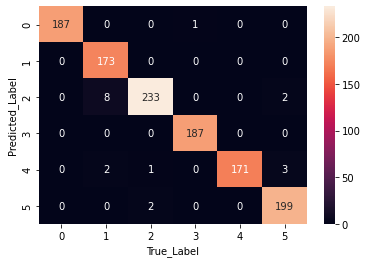

In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
df_d = pd.DataFrame()
df_d['True_Label']=depth
df_d['Predicted_Label']=comp
df_d['Scores']= sc
data_pivoted = df_d.pivot( "Predicted_Label","True_Label", "Scores")
ax = sns.heatmap(data_pivoted,annot=True,fmt="d")
plt.show()

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np 

model = KNeighborsClassifier(n_neighbors=7,n_jobs=1)
model.fit(train_x, train_y)

accuracy = accuracy_score(model.predict(test_x), test_y)
print(accuracy)
n_neighbors = np.array([7,8,9,10,12,15,20])
param_grid = dict(n_neighbors=n_neighbors)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(train_x, train_y)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

0.9837467921300257
0.975763154793112
7


In [ ]:
import matplotlib.pyplot as plt
print(grid.cv_results_)
print(grid.param_grid)
print(grid.best_score_)
print(grid.scorer_)


{'mean_fit_time': array([0.00394545, 0.00411062, 0.0040658 , 0.00406947, 0.00404563,
       0.00427947, 0.00427799]), 'std_fit_time': array([2.07654869e-04, 3.97693053e-05, 2.75574751e-05, 5.29537486e-05,
       4.20660109e-05, 4.14757077e-04, 3.74212293e-04]), 'mean_score_time': array([0.48049498, 0.47873316, 0.47674441, 0.48107424, 0.46994224,
       0.47273974, 0.47580967]), 'std_score_time': array([0.01099441, 0.01126974, 0.01433217, 0.01745321, 0.01052137,
       0.00814205, 0.00695521]), 'param_n_neighbors': masked_array(data=[7, 8, 9, 10, 12, 15, 20],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 12}, {'n_neighbors': 15}, {'n_neighbors': 20}], 'split0_test_score': array([0.97293447, 0.97150997, 0.96581197, 0.96296296, 0.96581197,
       0.95726496, 0.95299145]), 'split1_test_score': array([0.97720798,

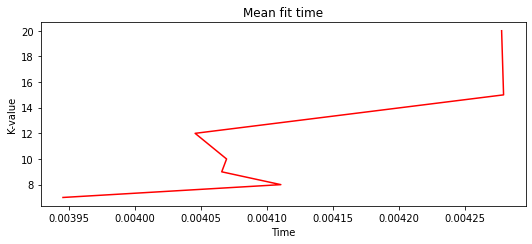

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.array([0.00394545, 0.00411062, 0.0040658 , 0.00406947, 0.00404563,0.00427947, 0.00427799])
y = np.array([7,8,9,10,12,15,20])

plt.title("Mean fit time")
plt.plot(x, y, color="red")
plt.xlabel('Time'),plt.ylabel('K-value')

plt.show()